# Brain activation patterns in avoidance

Author: Roos Kallansee
 
Date: 20-11-2024

Source: https://neurosynth.org/analyses/terms/avoidance/

### MRI data localization

Step 3.2: Write code that locates MRI data automatically

In [ ]:
import os
import glob # glob to search files that match a specific pattern

# Use glob for finding all files with the extension ".nii.gz" in the directory
data = glob.glob("*.nii.gz")
print(data)

['anatomical.nii.gz', 'avoidance_uniformity-test_z_FDR_0.01.nii.gz']


### Brain activation patterns

Step 3.3: Visualize functional data ontop of the anatomical scan

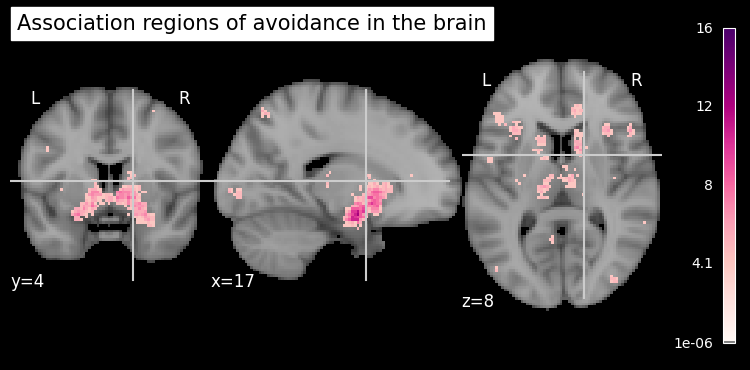

In [ ]:
import nilearn as nil
from nilearn import plotting, image

# Create loop for data files to identify anatomical and functional images, this way it can be used on any files containing these words:
for file in data:
    if "anatomical" in file:    # if file contains the word anatomical, then assign it to anatomical_data
        anatomical_data = file
    if "uniformity" in file:    # if file contains the word uniformity, then assign it to the functional_data
        functional_data = file

# load the images from files
functional_image= image.load_img(functional_data)
anatomical_image= image.load_img(anatomical_data)

# Stack images on top of each other using nilearn code; anatomical image is background (bg_img), functional image shows activation/statistical data (stat_map_img).
nil.plotting.plot_stat_map(
    stat_map_img=functional_image,
    bg_img=anatomical_image,
    title= ("Association regions of avoidance in the brain"),
    cmap="RdPu",    # set colour map for visual contrast
    vmin=(0.1),
    cut_coords=(17, 4, 8))  # define slice coordinates, interesting coordinates found with cut_coords = "ortho"

plotting.show()

### Histogram

Step 3.4: Plot a histogram of the values in the functional data file

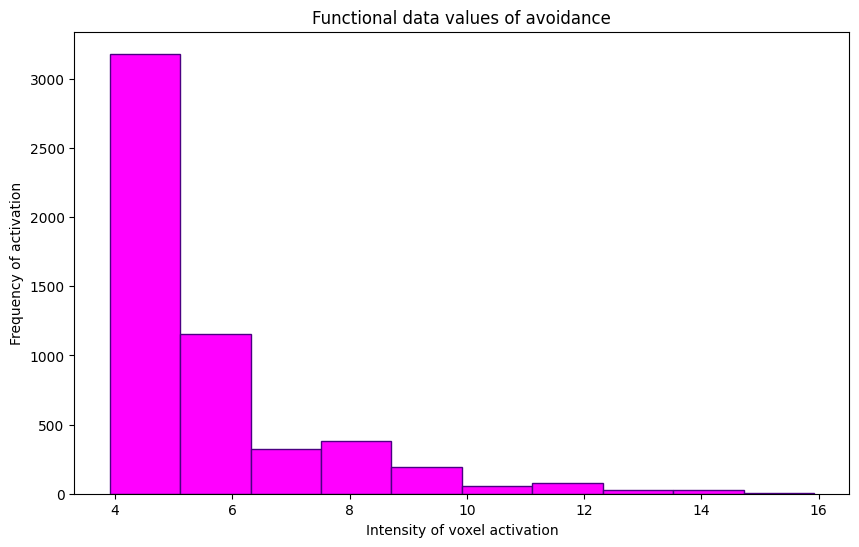

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load functional data file through path 
path_data = functional_data

# Alternate way:
# current_directory = os.getcwd()
# img = nib.load(os.path.join(current_directory,path))

img = nib.load(path_data)
functional_data = img.get_fdata()   # get data as numpy array (voxel values)

# Select all positive values, so >0. These are activation values greater than 0.
positive_values = functional_data[functional_data > 0]

# Plot histogram of postive values
plt.figure(figsize=(10, 6)) # create figure and set size
plt.hist(positive_values, color="magenta", edgecolor="indigo")

# Set title, and x-, and y-label forplot
plt.title("Functional data values of avoidance")
plt.xlabel("Intensity of voxel activation")
plt.ylabel("Frequency of activation")

plt.show()
